# GRIP:THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# AUTHOR: JANAPATI VINAY KUMAR YADAV

# TASK 2 : PREDICTION USING UNSUPERVISED ML

# From the given 'iris' dataset predicting the optimum number of clusters and representing it visually.



# Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt



# Read the data


In [24]:
data=pd.read_csv(r"file:///C:/Users/admin/Downloads/Iris%20-%20Iris.csv")

# Print 5 rows of data


In [25]:
print(data.head())
print(data.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


# Quick info of the data


In [26]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB
None


# Description of the dataset


In [27]:
print(data.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# Data types of all the varaibles of data 


In [28]:
print(data.dtypes)


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


# Removing unnecessary columns 'Id' and 'Species'


In [29]:
data=data.drop(columns=['Id','Species'])
print(data.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


In [30]:
features=data.columns
x=data[features].values

# Calculating best no. of cluster to be selected using WithinClusterSumOfSquare(WCSS)


In [31]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


# Plotting WCSS against cluster range


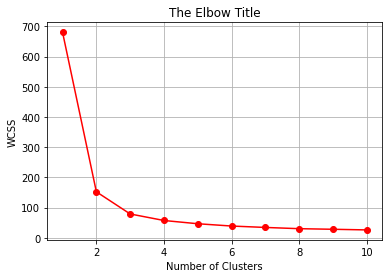

In [32]:
number_cluster=range(1,11)
plt.plot(number_cluster, wcss, marker='o', color='red')
plt.title('The Elbow Title')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


From the above graph, we can see that global minima occurred at k=3. This method shows the good number of clusters.

 

# Building the model on the data with calculated number of clusters


In [33]:
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Adding this column n the data set with the predicted values by the model


In [34]:
data['Clusters']=y_kmeans
print((data.head()))


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Clusters
0            5.1           3.5            1.4           0.2         1
1            4.9           3.0            1.4           0.2         1
2            4.7           3.2            1.3           0.2         1
3            4.6           3.1            1.5           0.2         1
4            5.0           3.6            1.4           0.2         1


# Visualising the cluster columns
# plt.title('Cluster of Iris Data')


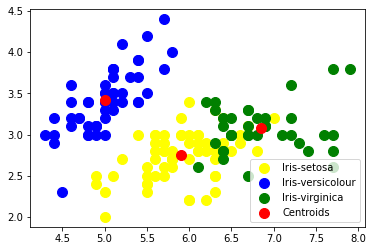

In [35]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()


# The k-means clusters of the given dataset have been plotted. The optimum number of clusters found is to be 3.

# End of Script